# Исследование объявлений о продаже квартир

В вашем распоряжении данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [ ]:
import pandas as pd

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

В датафрейме видим 23699 строк и 22 столбца, только 8 столбцов полностью заполнены, в остальных есть пропуски в данных. 

Столбец 'ceiling_height' (высота потолков) имеет пропуски в 9195 строках, скорее всего высота потолков в этих объявлениях стандартная, можно заменить их медианными значениями, эта замена не должна повлиять на результат исследования.  
Столбец 'floors_total' (количество этажей в доме) имеет 86 пропусков, эти пропуки могли появиться, если этаж, на котором расположена квартира в объявлении находится на последнем этаже.  
Столбец 'living_area' (жилая площадь) имеет 1903 пропуска, это существенный параметр удалять нельзя.  
Столбец 'is_apartment' (обозначение аппартаментов) всего 2775 заполненных строк, нужно проверить принцип заполнения, возможно обозначается ДА/НЕТ, тогда заполненные значения будут свидетельствовать о принадлежности помещения в обьявлении к аппартаментам, а пропуски в данных свидетельствовать о нежелании пользователя заполнять эту ячейку, если помещение не относится к данной категории. Аппартаменты не относятся к жилой недвижимости, поэтому после подтверждения гипотезы о пропусках в данных можно удалить объявления, относящиеся к этой категории.  
Столбец 'kitchen_area' (площадь кухни) имеет 2278 пропусков, .  
Столбец 'balcony' (количество балконов) имеет 11519 пропусков, можно предположить, что пропуски свидетельствуют об отсутствии балконов, эти пропуски можно заполнить "0".  
Столбец 'locality_name' (название населенного пункта) имеет 49 пропусков, возможно название населенного пункта добавляется двумя способами: вручную пользователем или по геолокации устройства, с которого выложено объявление, в этом случае пользователь понадеялся на гоелокацию, но включить в настройках её забыл, и это поле осталось пустым. Возможно названия населенного пукта отсутствует в списке населенных пунктов, а также отсутствует возможность добавлять названия вручную. В любом случае разработчикам необходимо сделать так, чтобы объявление невозможно было выложить без названиея населенного пункта.  
Столбцы 'airports_nearest' (расстояние до ближайшего аэропорта), 'cityCenters_nearest' (расстояние до центра города), 'parks_around3000' (число парков в радиусе 3 км), 'ponds_nearest' (расстояние до ближайшего водоема), 'days_exposition'(количество дней размещения объявления), пропуски в этих столбцах могут свидетельствовать о сбое во время выгрузки данных.


In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<hr style="border: 2px solid green;" />

## Предобработка данных

Для выполнения исследования необходимо подготовить данные. Изменить тип данных в колонках: 'first_day_exposition' на 'dataime', 'balcony', 'parks_around3000', 'ponds_around3000' на 'int' (количество балконов, парков, и водоемов не может быть вещественным числом).  
Также необходимо заполнить пропущенные значения.  
Пропуски в столбце 'locality_name' можно удалить, так как их количество незначительно.  
Пропуски в столбце 'floors_total' (количество этажей в доме)
Пропуски в столбцах 'ceiling_height' заполню медианным значением, 'living_area', 'kitchen_area' буду заполнять в зависимости от значений в других столбцах.  
Пропуски в столбце 'is_apartment' могут указывать на то, что пользователь пропустил поле с выбором вида недвижимости(аппартаменты или нет) так как его недвижимость не принадлежит к аппартаментам. В нашеи исследовании используются только данные о жилой недвижимости, поэтому объявления о аппартаментах можно удалить, после удаления этих объявлений можно удалить весь столбец 'is_apartment'.  
Пропуски в столбцах 'airports_nearest', 'cityCenters_nearest','parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' могут свидетельствовать о сбоях в программе картографических данных, так как в данных нет точного адреса или координат расположения обьекта недвижимости заполним эти пропуски медианными значениями групп данных по населенному пункту.  
Для поиска дубликатов в объявлениях в столбцах со строковыми данными приведем значения к одному регистру и произведем замену логически одинаковых названий. 

In [ ]:
# изменение типа данных в колонках: 'first_day_exposition' на 'dataime'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')

In [ ]:
#удалил пропущенные значения наименования населенных пуктов
df = df.drop(df[df['locality_name'].isna()].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['is_apartment']==True].index).reset_index(drop=True) #удалил строки со значением True (об аппартаментах)
df = df.drop(['is_apartment'], axis=1)# удалил столбец

In [ ]:
#преобразует все строковые значения в таблице в нижний регистр
for column in df.select_dtypes('object').columns:
    df[column] = df[column].str.lower()

In [ ]:
df['balcony'] = df['balcony'].fillna(0) # заполнил пропуски "0"

In [ ]:
# скорее всего этаж указанный в объявлении является последним, поэтому не указана этажность дома
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor']

Для заполнения пропусков в столбцах 'living_area', 'kitchen_area' определим отношение медиан этих площадей к медиане общей площади и заполним пропущенные значения в столбцах 'living_area', 'kitchen_area' произведением значения в столбце 'total_area' на найденные отношения. Квартиры студии не имеют кухни поэтому пропущеные значения столбца 'kitchen_area' в объявлениях о продаже квартир-студи можно заполнить "0"  
Также в столбце 'living_area' есть неправдоподобно маленькие значения, такие значения это ошибки ввода данных пользователем, такие значения сравним с получившимся у нас и если оно меньше заменим это значение.

In [ ]:
# заполняю пропущеные значения в столбце "площадь кухни " на "0", если квартира является студией.
df.loc[(df['studio'] == True) & (df['kitchen_area'].isna()),  'kitchen_area']=0

In [ ]:
#вычисляю отношение жилой площади к площади общей
area_division = df['living_area'].median()/df['total_area'].median()
# вычисляю отношение площади кухни к площади общей
kitchen_area_division = df['kitchen_area'].median()/df['total_area'].median()
# заполняю пропущенные значения жилой площади с учетом общей площади и отношения жилой площади к общей
df.loc[df['living_area'].isna(), 'living_area'] = df.loc[df['living_area'].isna(), 'total_area']*area_division
#заполняю пропущенные значения площади кухни с учетом общей площади и отношения площади кухни к общей площади
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df.loc[df['kitchen_area'].isna(), 'total_area']*kitchen_area_division

In [ ]:
# заполняю пропущенные значения высоты потолков на медианные значения.
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [ ]:
#изменяю тип данных в столбце 'balcony'
df['balcony'] = df['balcony'].astype('int')

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

In [ ]:
# устраним пропуски в столбце 'balcony', заменим их на 0
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Расстояния до центра, прудов и парков лучше всего заполнить медианой с группировкой по населенному пункту
for name in df['locality_name'].unique():
    median = df.loc[df['locality_name']==name, 'airports_nearest'].median()
    df.loc[(df['airports_nearest'].isna())&(df['locality_name']==name), 'airports_nearest']=median
    median_centr = df.loc[df['locality_name']==name, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna())&(df['locality_name']==name), 'cityCenters_nearest']=median_centr
    median_parks = df.loc[df['locality_name']==name, 'parks_nearest'].median()
    df.loc[(df['parks_nearest'].isna())&(df['locality_name']==name), 'parks_nearest']=median_parks
    median_ponds = df.loc[df['locality_name']==name, 'ponds_nearest'].median()
    df.loc[(df['ponds_nearest'].isna())&(df['locality_name']==name), 'ponds_nearest']=median_ponds

In [ ]:
# оставшиеся пропуски могут сказать о том, что в некоторых группах по названиям населенных пунктов отсутствуют данные о
# о расстояниях до аэропорта, центра города, парков и водоемах, а также отсутствуют данные о количестве парков и водоёмов
# в радиусе 3 км. поэтому заменим эти пропуски медианными значениями вне зависимости от названия населенного пункта
# также приведем значения в столбцах 'parks_around3000' и'ponds_around3000' к типу 'int'.
df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df['airports_nearest'].median()
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()
df.loc[df['parks_nearest'].isna(), 'parks_nearest'] = df['parks_nearest'].median()
df.loc[df['ponds_nearest'].isna(), 'ponds_nearest'] = df['ponds_nearest'].median()
df.loc[df['parks_around3000'].isna(), 'parks_around3000'] = df['parks_around3000'].median()
df.loc[df['ponds_around3000'].isna(), 'ponds_around3000'] = df['ponds_around3000'].median()
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [ ]:
df.duplicated().sum() # проверил на наличие явных дубликатов.

0

В ходе предобработки данных были заполнены пропуски в столбцах 'parks_around3000', 'ponds_around3000','ceiling_height' медианными значениями. В столбцах 'airports_nearest', 'cityCenters_nearest',  'parks_nearest', 'ponds_nearest' пропуски были заполнены медианными значениями в зависимости от названия населенного пункта.  
Пропуски в стоблце 'locality_name' были удалены так как нет данных геолокации или координат объектов продажи и заполнить эти данные не представляется возможным. Названия населенных пунктов привел к однообразным значениям. Строковые данные во всех столбцах привел к нижнему регистру.  
Пропуски в столбцах 'living_area', 'kitchen_area' заполнил расчетными данными в зависимости от общей площади квартиры. Квартиры студии не имеют кухни, поэтому площадь кухни в этих объявлениях заполнил "0".  
Также "0" заполнил пропуски в столбце 'balcony' так как предположил, что эти данные не были заполнены пользователем так как балкон отсутствует.  
Объявления о продаже аппартаментов также удалил. Исследование мы проводим на продаже жилой недвижимости, аппартаменты являются коммерческой недвижимостью хоть и предназначены для проживания.  
Привел данные в столбце 'first_day_exposition' к формату datetime, данные в столбцах 'parks_around3000', 'ponds_around3000', 'balcony' к формату 'int'.


## Расчёты и добавление результатов в таблицу

In [ ]:
#добавлю столбец с ценой квадратного метра 'total_area_price' 
df['total_area_price'] = df['last_price']/df['total_area']

In [ ]:
# добавляю столбец с днем недели, месяцем (числовой), месяцем (полный) и годом добавления объявления
df['first_weekday_exposition'] = df['first_day_exposition'].dt.weekday # выделяю день номер дня недели
# формирую список дней недели
weekdays = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
for day in df['first_weekday_exposition'].unique(): # циклом меняю номер на день недели
    df.loc[df['first_weekday_exposition']==day,'first_weekday_exposition']=weekdays[day]

df['first_year_exposition'] = df['first_day_exposition'].dt.year # добавляю столбец с годом добавления объявления
# добавляю столбец с месяцем (числом) добавления объявления
df['first_month_exposition'] = df['first_day_exposition'].dt.month
# добавляю столбец с месяцем (полный) добавления объявления
df['first_month_full_exposition'] = df['first_day_exposition'].astype('datetime64[M]')

In [ ]:
# функция добавляет в столбец 'floor_group' группировку по этажам
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
df['floor_group'] = df.apply(floor_category, axis = 1) 

In [ ]:
# добавляем столбец с отношением жилой площади к общей площади
df.loc[: ,'area_ratio'] = df.loc[:, 'living_area']/df.loc[:, 'total_area']

In [ ]:
# # добавляем столбец с отношением площади кухни к общей площади
df.loc[: ,'kitchen_area_ratio'] = df.loc[:, 'kitchen_area']/df.loc[:, 'total_area']

Добавил в таблицу столбцы:  
'total_area_price' - стоимость квадратного метра общей площади.  
'first_weekday_exposition' - день недели публикации объявления.  
'first_year_exposition' - год публикации объявления.  
'first_month_exposition' - месяц публикации объявления, выраженный числом, вне зависимости от года.  
'first_month_full_exposition' - месяц вместе с годом, для более корректного отображения зависимости месяца публикации объявления и стоимомти квартиры.  
'floor_group' - группировка объявлений по этажу, "первый", "другой", "последний".  
'area_ratio' - отношение жилой площади к общей площади.  
'kitchen_area_ratio' - отношение площади кухни к общей площади квартиры.

## Исследовательский анализ данных

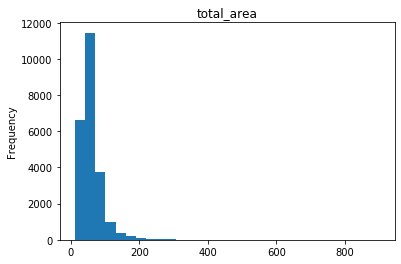

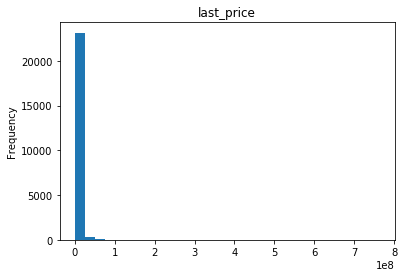

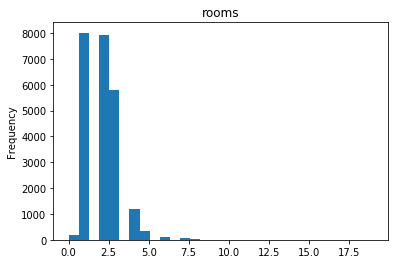

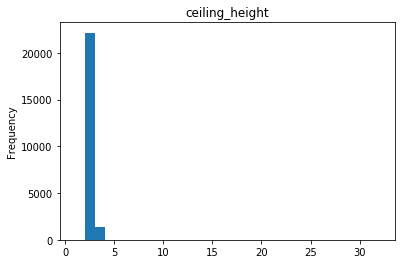

In [ ]:
# строим гистограммы для площади, цены, числа комнат, высоты полтолков
import matplotlib.pyplot as plt
columns_for_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for name_column in columns_for_hist:
    df[name_column].plot(y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();
    

In [ ]:
# циклом вычисляем анешние границы наборов данных по списку columns_for_hist
# и удаляем выбросы 
for name_column in columns_for_hist:
    Q1 = df[name_column].quantile(0.25)
    Q3 = df[name_column].quantile(0.75)
    IQR = Q3-Q1
    df = df.drop(df.loc[~(((df[name_column])<(Q3 + 3 * IQR)) & ((df[name_column])>(Q1 - 3 * IQR)))].index).reset_index(drop=True)
    
   

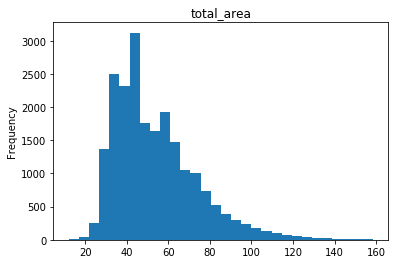

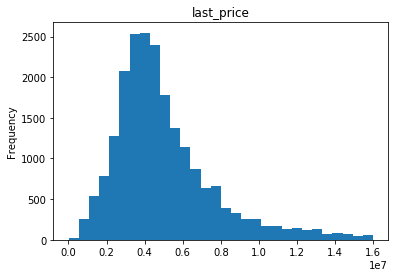

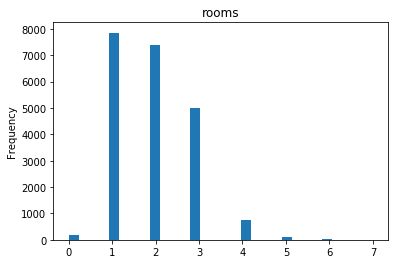

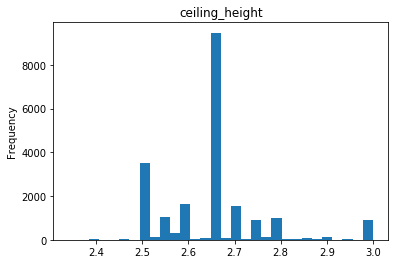

In [ ]:
# строим гистограммы по очищеным от выбросов данным
for name_column in columns_for_hist:
    df[name_column].plot(y=name_column, kind='hist', title = name_column, bins=30)
    plt.show();
  

Построили гистограммы для значений общей площади, цены квартиры, количества комнат и высоты потолков. На гистограммах видно, что большинство объявлений имеют приблизительно одинаковые значения, но есть и выбивающиеся из общего правила значения.  
На гистограмме общей площади видим, что большинство квартир имеют площадь до 100 квадратных метров, с увеличением площади уменьшается и количество квартир, но есть и квартиры с площадью более 200 квадратных метров. Максимальное значение в 900 квадратных метров возможно ошибка на этапе ввода данных, а возможно и реальная площадь квартиры.  
На гистограмме цены квартир видно, что цена распределена более равномерно, но без высоких значений также не обошлось.  
Количество комнат начинается с 0, скорее всего у квартир-студий, есть значения и в 19 комнат, что говорит о том, что общая площадь в 900 квадратных метров реальна.  
Определили внешние границы набора данных о высоте потолков и удалили строки, содержащие значения за этими границами.

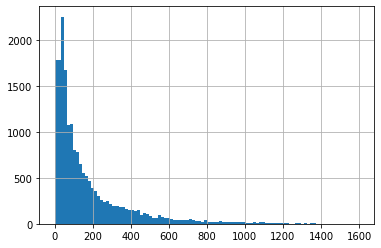

In [ ]:
# строим гистограмму по данным столбца  days_exposition
df['days_exposition'].hist(range=(0,1600), bins=100);


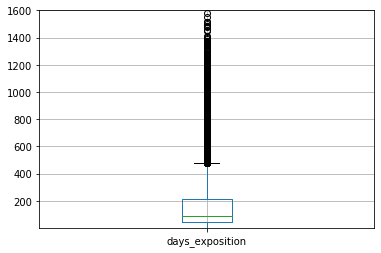

In [ ]:
# строим диаграмму размаха
df.boxplot(column = 'days_exposition')
plt.ylim(1,1600);

In [ ]:
df['days_exposition'].describe()

count    18720.000000
mean       172.832959
std        211.881443
min          1.000000
25%         44.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

По гистограмме и диаграмме размаха видно, что среди нормальных значений есть выбивающиеся значения. Также можно сказать, что продажа квартиры в период до 45 дней является быстрой, а продажа свеше 486 дней является медленной. В среднем продажа квартир занимала 180 дней, что нельзя брать в расчет из-за аномально долгой продажи в 1580 дней, такая сверхдолгая продажа может быть обусловлена соотношением высокой цены и состояния квартиры, или забывчивастью продавца (квартира продалась быстро, но продавец не снял объявление с публикации). В такой ситуации можно сделать вывод, что продажа квартиры занимает от 45 до 476 дней.  
Определим внутренние границы набора данных столбца 'days_exposition' и удалим выбросы.

In [ ]:
# нижний квартиль Q1 = 45
# верхний квартиль Q3 = 231
# найдем межквартильный диапазон, внутренние границы набора данных о количестве дней размещения объявления
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3-Q1
# внутренние границы набора данных о количестве дней размещения объявления
Q1 - 1.5 * IQR, Q3 + 1.5 * IQR


(-215.5, 476.5)

In [ ]:
# удалим строки значения столбца 'days_exposition' в которых не попадают во внутренние границы набора данных.
df = df.drop(df.loc[~(((df['days_exposition'])<(Q3 + 1.5 * IQR)) & ((df['days_exposition'])>(Q1 - 1.5 * IQR)))].index).reset_index(drop=True)

In [ ]:
df['days_exposition'].describe() # количество строк уменьшилось до 15462, но и стандартное отклонение уменьшилось почти в два раза

count    17116.000000
mean       120.726104
std        112.917634
min          1.000000
25%         39.000000
50%         79.000000
75%        172.000000
max        476.000000
Name: days_exposition, dtype: float64

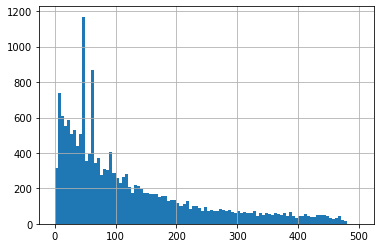

In [ ]:
# после удаления выбросов гистограмма стала более плавной, что говорит о более полных данных
df['days_exposition'].hist(range=(0,500), bins=100);

На гистограмме видны пики на 40 и 60 днях публикации объявлений, это может означать, что продавец, после некоторого времени публикации объявления не получил желаемого количества просмотра квартиры и не продал ее, что побудило его к снижению цены, или объявления автоматически снимаются с публикации на этих сроках.

In [ ]:
df.info() # проверим количество строк, оставшихся для анализа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17116 entries, 0 to 17115
Data columns (total 29 columns):
total_images                   17116 non-null int64
last_price                     17116 non-null float64
total_area                     17116 non-null float64
first_day_exposition           17116 non-null datetime64[ns]
rooms                          17116 non-null int64
ceiling_height                 17116 non-null float64
floors_total                   17116 non-null float64
living_area                    17116 non-null float64
floor                          17116 non-null int64
studio                         17116 non-null bool
open_plan                      17116 non-null bool
kitchen_area                   17116 non-null float64
balcony                        17116 non-null int64
locality_name                  17116 non-null object
airports_nearest               17116 non-null float64
cityCenters_nearest            17116 non-null float64
parks_around3000               1711

После удаления редких и выбивающихся значений осталось 17116 строк.

Для того, чтобы узнать зависимость цены от других параметров найдем корреляцию.

In [ ]:
df_sort = df.loc[: , ['total_area_price', 'total_area', 'rooms', 'cityCenters_nearest']]

In [ ]:
df_sort.corr()

,total_area_price,total_area,rooms,cityCenters_nearest
total_area_price,1.000000,-0.010837,-0.186011,-0.227426
total_area,-0.010837,1.000000,0.801466,-0.122160
rooms,-0.186011,0.801466,1.000000,-0.085102
cityCenters_nearest,-0.227426,-0.122160,-0.085102,1.000000


По коэффициенту корреляции видно, что стоимость квадратного метра жилой площади и общая площадь квартиры имеею отрицательную взаимосвязь, чем больше площадь, тем дешевле стоит квадратный метр (оптом дешевле), но она выражена слабо так как коэффициент корреляции близок к нулю.  
Зависимость цены квадратного метра от количества комнат также отрицательна, увеличение количества комнат увеличивает площадь квартиры, увеличение площади ведет к удешевлению квадратного метра.  
Расстояние до центра города также снижает стоимость квадратного метра с увеличением.  
Визуализируем корреляцию.

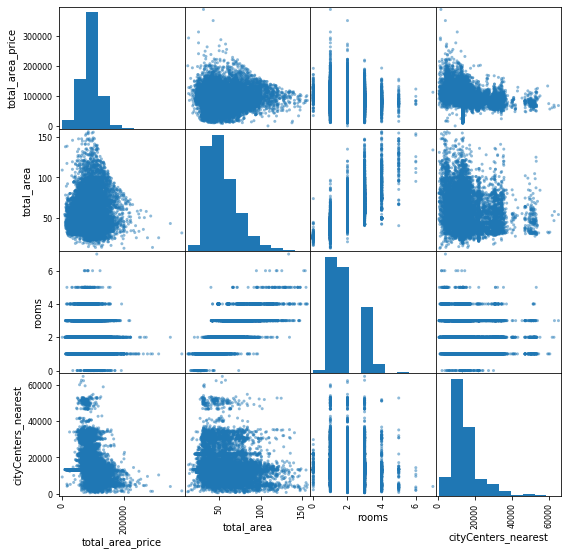

In [ ]:
# хоть матрица диаграмм рассеяния нне очень информативна, но построим её
pd.plotting.scatter_matrix(df_sort, figsize=(9, 9));

На матрице рассеяния видно, основная часть данных сосредоточена в одном месте диаграммы, выбивающиеся значения есть, но их не много.

Влияние этажа, дня недели и даты публикации объявления выразим графиками зависимости.  
Для построения графиков сгруппируем нужные столбцы.

In [ ]:
# сгруппируем данные о стоимости квадратного метра по этажу квартиры
floor_group_price = df.pivot_table(index='floor_group', values='total_area_price', aggfunc='median')
floor_group_price = floor_group_price.sort_values(by='total_area_price')

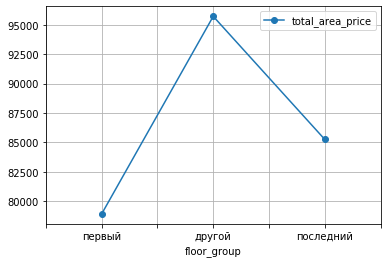

In [ ]:
floor_group_price = df.pivot_table(index='floor_group', values='total_area_price', aggfunc='median')
group=['первый', 'другой', 'последний']
floor_group_price = floor_group_price.reindex(group).reset_index()
floor_group_price.plot(x='floor_group', y = 'total_area_price', style='o-', xlim=(-0.5, 2.5), grid=True);

По графику видно, что самая низкая цена квадратного метра у квартир на первом этаже, у квартир на последнем этаже цена квадратного метра выше. Самая высокая стоимость у квартир на других этажах.

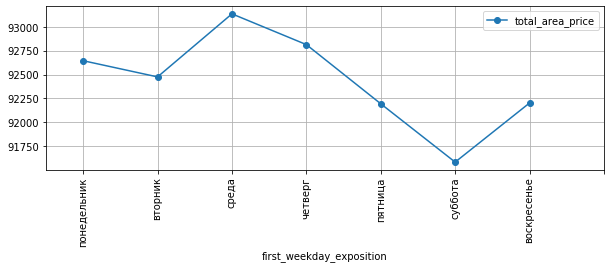

In [ ]:
# сгруппируем данные о стоимости квадратного метра по дню недели публикации объявления
# заменим индексы таблицы на индексы списка дней недели и создадим столбец с днями недели
# для последовательной визуализации
first_weekday_exposition_price = df.pivot_table(index='first_weekday_exposition', values='total_area_price', aggfunc='median')
first_weekday_exposition_price = first_weekday_exposition_price.reindex(weekdays).reset_index()
plot = first_weekday_exposition_price.plot(x ='first_weekday_exposition', y = 'total_area_price', style='o-', xlim=(-0.5, 7), grid=True, figsize=(10, 3))
plt.xticks(rotation=90);

По графику видно, что самая высокая цена квадратного метра в объявлениях, опубликованных в среду, к субботе цена квадратного метра значительно падает, с воскресенья снова начинает подниматься, но по вторникам чуть падает.

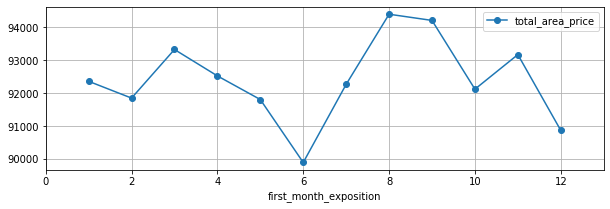

In [ ]:
# сгруппируем данные о стоимости квадратного метра по месяцу публикации объявления
# построим график
first_month_exposition_price = df.pivot_table(index='first_month_exposition', values='total_area_price')
plot = first_month_exposition_price.plot(y = 'total_area_price', style='o-', xlim=(0, 13), grid=True, figsize=(10, 3));

По графику видно, что самая высокая цена квадратного метра у объявлений, опубликованных в августе. Возможно большую часть продающихся квартир составляют квартиры с меньшей площадью или с минимальным количеством комнат, что сказывается на цене квадратного метра. 
Проверим это.

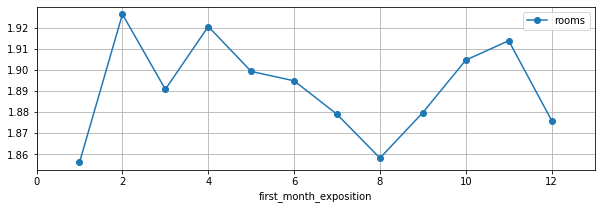

In [ ]:
# сгруппируем данные о количестве комнат в квартирах по месяцу публикации объявления
# построим график
first_month_exposition_price = df.pivot_table(index='first_month_exposition', values='rooms')
first_month_exposition_price.plot(y = 'rooms', style='o-', xlim=(0, 13), grid=True, figsize=(10, 3));

Предположение о продаже большего количества однокомнатных квартир в августе подтвердилось. 

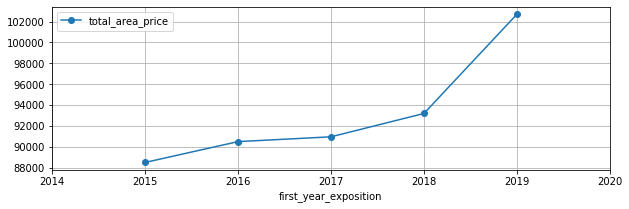

In [ ]:
# сгруппируем данные о стоимости квадратного метра по году публикации объявления
# построим график
first_year_exposition_price = df.pivot_table(index='first_year_exposition', values='total_area_price')
first_year_exposition_price.plot(y = 'total_area_price', style='o-', xlim=(2014, 2020), grid=True, figsize=(10, 3));



На графике видно, что стоимость квадратного метра с каждым годом растет.    Проверим связано ли это с уменьшением количества комнат в продаваемых квартирах.

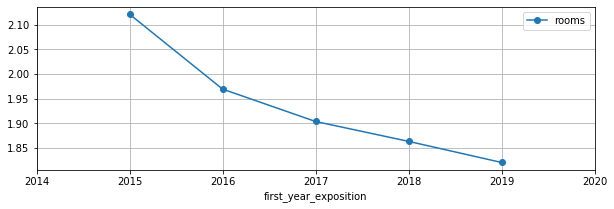

In [ ]:
# сгруппируем данные о количестве комнат в квартирах по году публикации объявления
# построим график 
(df.pivot_table(index='first_year_exposition', values='rooms')).plot(y = 'rooms', style='o-', xlim=(2014, 2020), grid=True, figsize=(10, 3));


На графике видно, что к 2019 году снижается количество комнат в продаваемых квартирах.

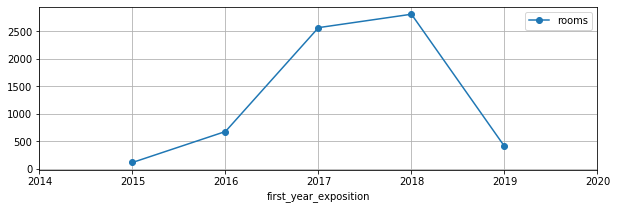

In [ ]:
# сформируем датасет только с однокомнатными квартирами и построим график 
rooms_group = df.loc[df['rooms']==1]
(rooms_group.pivot_table(index='first_year_exposition', values='rooms', aggfunc='count')).plot(style='o-', xlim=(2014, 2020), grid=True, figsize=(10, 3));


По графику видно, что количество объявлений о продаже однокомнатных квартир росло до 2018 года, к 2019 количество объявлений снизилось. Возможно это произошло из-за общего снижения количества объявлений. В данном случае лучше всего считать и сравнивать по годам долю объявлений о продаже однокомнатных квартир в общем количестве объявлений.  
    

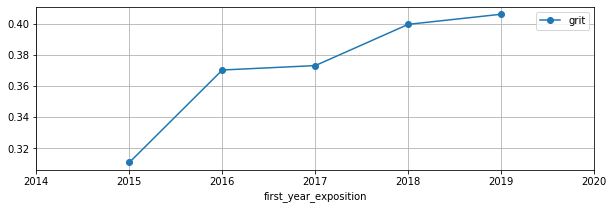

In [ ]:
# перезапишем датафрейм для проверки этой гипотезы
# в столбце 'rooms' значения не равные 1 заменим на 0
# сгруппируем по году публикации и вычислим среднее значение в столбце 'rooms'
# построим график
df_grit = df
df_grit.loc[df['rooms']!=1,'rooms']=0
df_grit = df_grit.groupby(['first_year_exposition']).agg({'rooms':['mean']})
df_grit.columns = ['grit']
df_grit.plot(y='grit', style='o-', xlim=(2014, 2020), grid=True, figsize=(10, 3));

In [ ]:
# создадим список из 10 населенных пунктов с самым большим количеством объявлений.
name_big = df['locality_name'].value_counts().head(10)

In [ ]:
# создадим новый датасет df_name_big, содержащий только объявления о продаже квартир в топ-10 населенных пунктов
# вычислим среднюю стоимость квадратного метра для каждого населенного пункта.
# выведем на экран.
df_name_big = df.query('locality_name in @name_big.index')
name_big_mean = df_name_big.pivot_table(index='locality_name', values='total_area_price', aggfunc='mean')
name_big_mean = name_big_mean.sort_values(by='total_area_price', ascending=False)
name_big_mean

,total_area_price
locality_name,
санкт-петербург,105557.396966
пушкин,99858.693630
деревня кудрово,92622.015069
посёлок парголово,89174.255255
посёлок мурино,85957.989342
посёлок шушары,77888.640648
колпино,74553.453366
гатчина,67917.930255
всеволожск,66760.545358


In [ ]:
# выведем на экран населенный пункт с самой высокой стоимостью квадратного метра.
name_big_mean.head(1)

,total_area_price
locality_name,
санкт-петербург,105557.396966


Ожидаемо первое место занял Санкт-Петербург

In [ ]:
# выведем на экран населенный пункт 10 места в топ-10
name_big_mean.tail(1)

,total_area_price
locality_name,
выборг,56668.163021


На 10 месте по стоимости квадратного метра оказался Выборг

In [ ]:
# создадим датасет с объявлениями о продаже квартир только в Санкт-Петербурге
# добавим столбец с расстоянием до тцентра города, выраженным в километрах
piter_group = df.loc[df['locality_name']=='санкт-петербург']
piter_group['cityCenters_nearest_filter'] = round(piter_group['cityCenters_nearest']/1000)
piter_group['cityCenters_nearest_filter'].describe()

count    10983.000000
mean        12.528999
std          4.336872
min          0.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_filter, dtype: float64

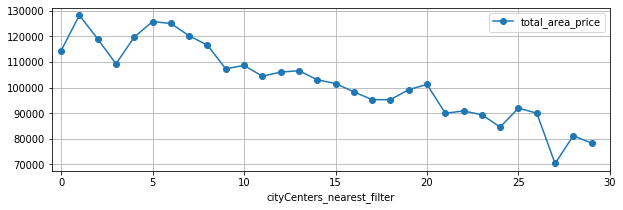

In [ ]:
# проверим как снижается стоимость квадратного метра жилья с удалением от центра города
# сгруппируем по удаленности от центра и высчитаем среднюю стоимость площади квартир
# отсортируем по удаленности от центра и построим график
piter_group_mean = piter_group.pivot_table(index='cityCenters_nearest_filter', values='total_area_price', aggfunc='mean')
piter_group_mean = piter_group_mean.sort_values(by='cityCenters_nearest_filter')
piter_group_mean.plot(y = 'total_area_price', style='o-', xlim=(-0.5, 30), grid=True, figsize=(10, 3));

По графику видно, что с расстоянием от 1 до 3 км цена снижается, от 3 до 5 км цена растет, после 5 км наблюдается общая тенденция к снижению стоимости квадратного метра.  
Примем за центр города расстояние менее 4 км.

In [ ]:
# выделяю квартиры в центре (расстояние меньше 4 км)
piter_group_center = piter_group.query('cityCenters_nearest_filter < 4')

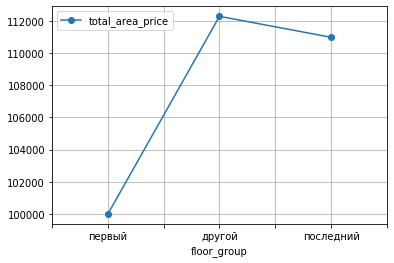

In [ ]:
# проверим измение стоимости квадратного метра от расположения квартиры по этажам 
floor_group_price_center = piter_group_center.pivot_table(index='floor_group', values='total_area_price', aggfunc='median')
floor_group_price_center = floor_group_price_center.reindex(group).reset_index()
floor_group_price_center.plot(x='floor_group', y = 'total_area_price', style='o-', xlim=(-0.5, 2.5), grid=True);

На графике видно, что стоимость квадратного метра также возрастает от первого к последнему и промежуточным этажам, но по сравнению с общими данными стоимость квадратного метра квартир в центре на последнем и промежуточных этажах меняется не так сильно, чем между первым и последним этажами.

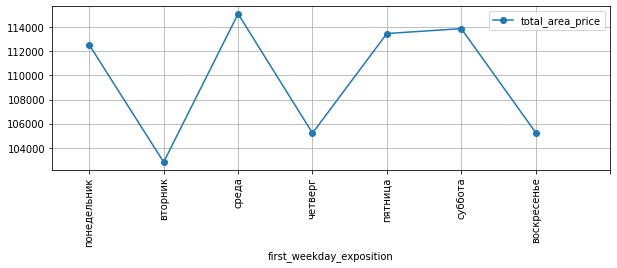

In [ ]:
# построим график зависимости стоимости квадратного метра от дня недели публикования объявления.
first_weekday_exposition_price_center = piter_group_center.pivot_table(index='first_weekday_exposition', values='total_area_price', aggfunc='median')
first_weekday_exposition_price_center = first_weekday_exposition_price_center.reindex(weekdays).reset_index()
first_weekday_exposition_price_center.plot(x ='first_weekday_exposition', y = 'total_area_price', style='o-', xlim=(-0.5, 7), grid=True, figsize=(10, 3))
plt.xticks(rotation=90);

Максимальная стоимость также в объявлениях опубликованных в среду, а минимальная у объявлений, опубликованных во вторник.

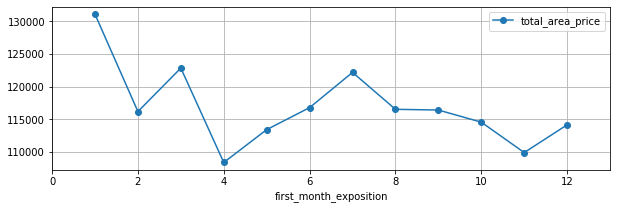

In [ ]:
# Построим график зависимости стоимости квадратного метра от месяца публикования объявления.
(piter_group_center.pivot_table(index='first_month_exposition', values='total_area_price')).plot(y ='total_area_price', style='o-', xlim=(0, 13), grid=True, figsize=(10, 3));


В отличии от графика зависимости стоимости квдратного метра построенного по всем данным датафрейма, на графике стоимости квартир в центре видно, что самая высокая стоимость квадратного метра в объявлениях опубликованных в январе, а минимальная в апреле.

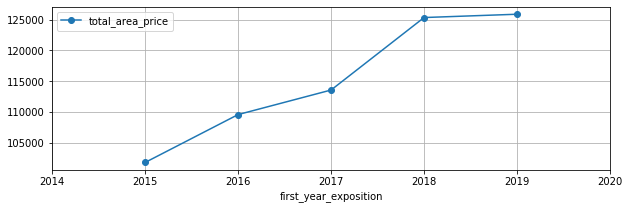

In [ ]:
# пострим график зависимости стоимости квадратного метра от года продажи квартиры
(piter_group_center.pivot_table(index='first_year_exposition', values='total_area_price')).plot(y = 'total_area_price', style='o-', xlim=(2014, 2020), grid=True, figsize=(10, 3));

Тенденция к росту стоимости квадратного метра с течением времени, сохраняется, но с 2018 по 2019 год стоимость выросла незначительно.

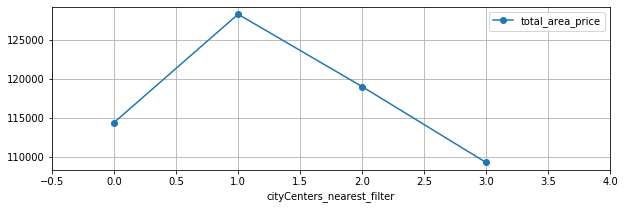

In [ ]:
# построим график зависимости стоимости квдратного метра от удаленности от центра.
piter_group_mean_center = piter_group_center.pivot_table(index='cityCenters_nearest_filter', values='total_area_price', aggfunc='mean')
piter_group_mean_center = piter_group_mean_center.sort_values(by='cityCenters_nearest_filter')
piter_group_mean_center.plot(y = 'total_area_price', style='o-', xlim=(-0.5, 4), grid=True, figsize=(10, 3));


Этот график увеличенная часть графика до 3 км, построенного по всем объявлениям Санкт-Петербурга. 

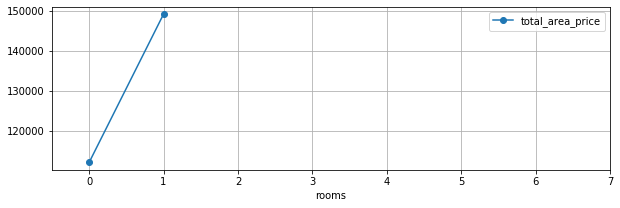

In [ ]:
# построим график зависимости стоимости квадратного метра от количества комнат.
rooms_mean_center = piter_group_center.pivot_table(index='rooms', values='total_area_price', aggfunc='mean')
rooms_mean_center = rooms_mean_center.sort_values(by='rooms')
rooms_mean_center.plot(y = 'total_area_price', style='o-', xlim=(-0.5, 7), grid=True, figsize=(10, 3));


С увеличением количества комнат стоимость квадратного метра снижается. (Оптом дешевле)

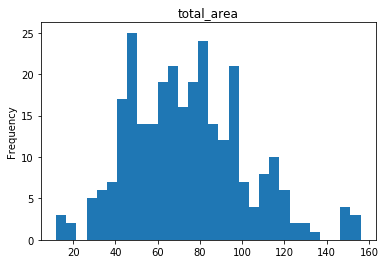

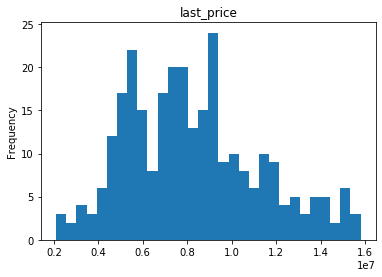

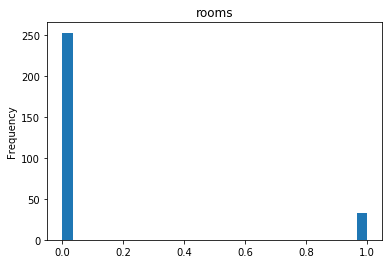

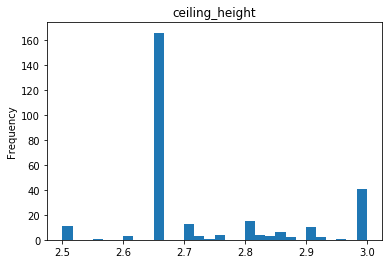

In [ ]:
# 
columns_for_hist_center = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for name_column in columns_for_hist_center:
    piter_group_center[name_column].plot(y=name_column, kind='hist', title = name_column, bins=30)
    plt.show()

Гистограммы общей площади и цене квартиры близки к нормальному распределению, в отличии от гистограмм по всему датафрейму.  
Гистограммы количества комнат и высоты потолков близки к аналогичным гистограммам по всему датафрейму.

## Общий вывод

В ходе исследования проведено заполнение пропущенных значений, преобразование данных в столбцах  к нужному типу, выделены и удалены выбросы дынных.  


Стоимость квадратного метра зависит от площади квартиры, количества комнат, этажа расположения квартиры и удаленности от центра города. Самые высокая стоимость квадратного метра у однокомнатной квартиры, расположенной между первым и последним этажом на расстоянии до 1 км от центра города.  
Для квартир в области точно такое же влияние оказывают те же самые параметры.  
Время публикации объявления не оказывает существенного влияния на стоимость квадратного метра. С каждым годом стоимость квадратного метра растет.